In [44]:
import sklearn 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import tree 
from sklearn.model_selection import train_test_split 
dataset = pd.read_csv('star_classification.csv')

In [45]:
class_mapping = {
    'STAR': 0,
    'GALAXY': 1,
    'QSO': 2
}

x = dataset[['u', 'g', 'r', 'i', 'z', 'redshift']].to_numpy()
y = dataset['class'].map(class_mapping).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
y[500]

0

In [61]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 3000)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3000)

In [62]:
num_samples = x_test.shape[0]

predictions = classifier.predict(x_test)

correct = (predictions & y_test).sum()
        
print(f'Accuracy: {correct / num_samples * 100:.2f}%')

Accuracy: 90.69%


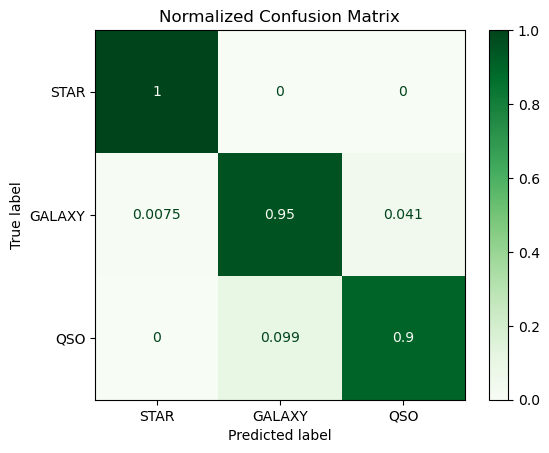

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    display_labels=['STAR', 'GALAXY', 'QSO'],
    normalize='true',
    cmap=plt.cm.Greens
)
disp.ax_.set_title('Normalized Confusion Matrix')
plt.show()

In [64]:
# from dtreeviz.trees import dtreeviz
# from sklearn.tree import export_graphviz
# export_graphviz(classifier, feature_names=['u', 'g', 'r', 'i', 'z', 'redshift'], 
# out_file='age_sal_tree.dot', filled=True)
# !dot -Tpng '../../img/age_sal_tree.dot' -o '../../img/age_sal_tree.png'

Text(0.5, 1.0, 'Дерево решений')

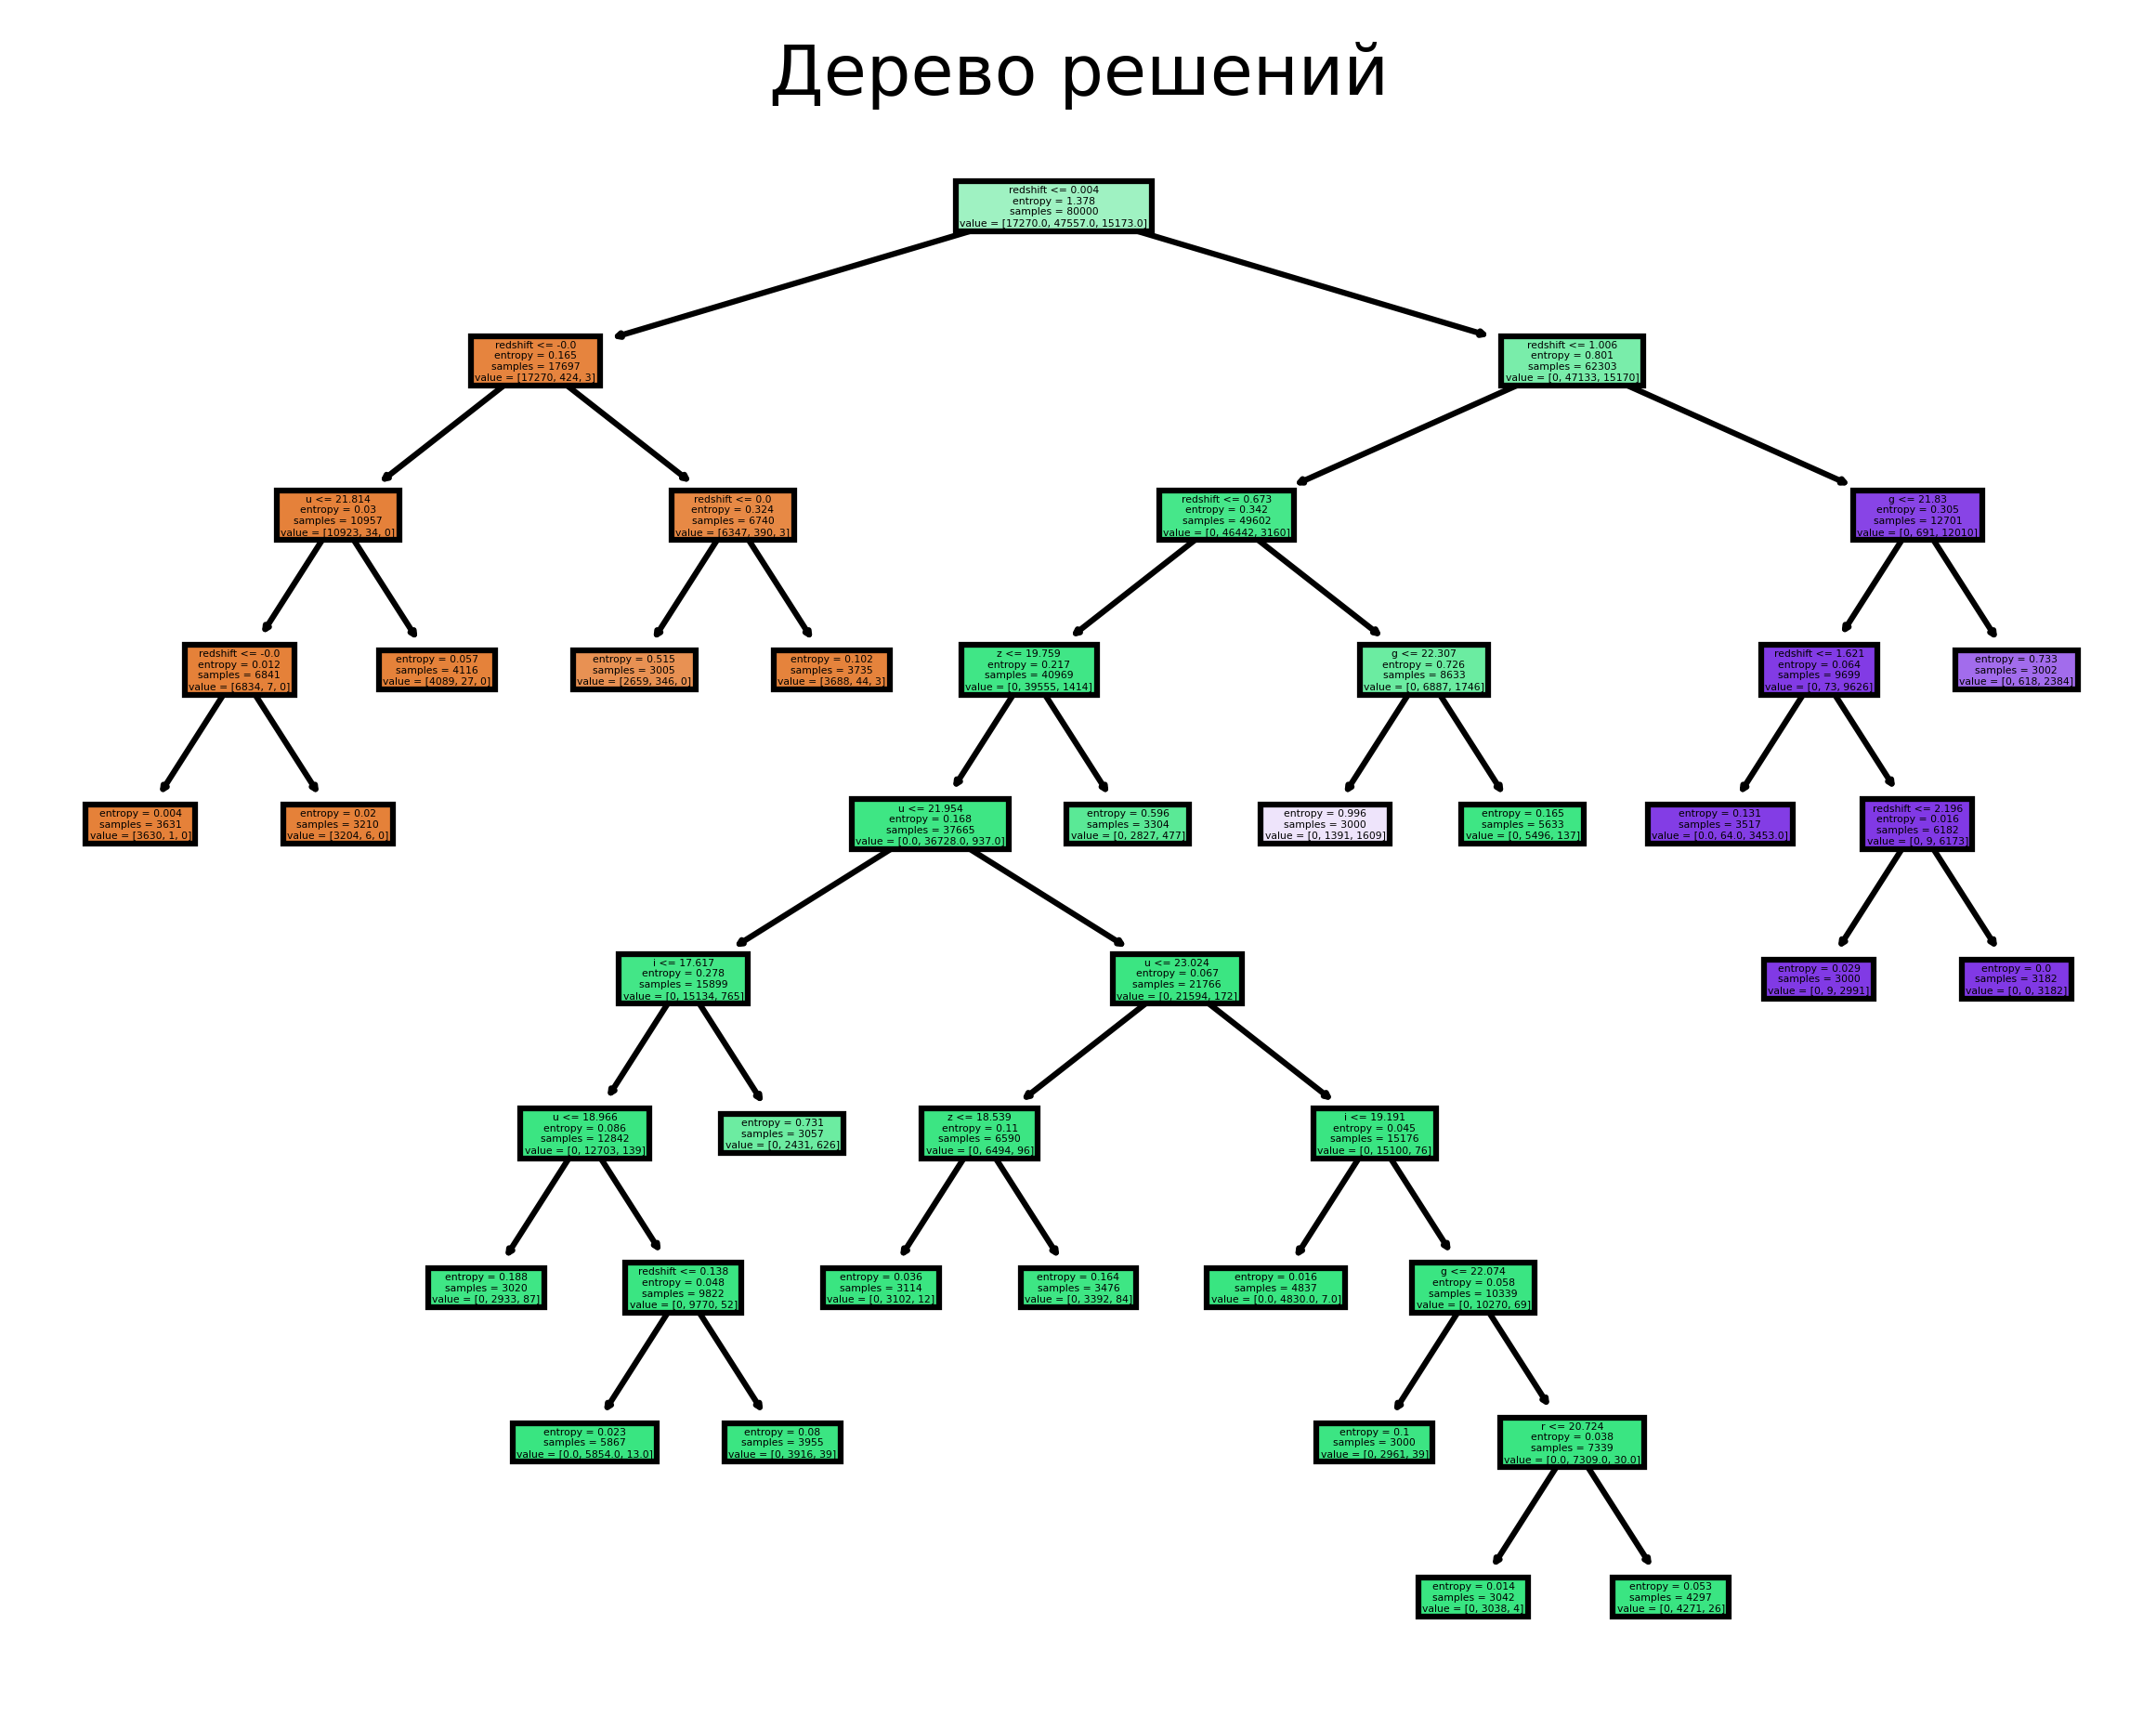

In [65]:
DPI = 450 
plt.figure(dpi=DPI) 
tree.plot_tree(classifier, feature_names=['u', 'g', 'r', 'i', 'z', 'redshift'], filled=True) 
plt.title("Дерево решений") 